In [1]:
from source import data_wrangle
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sb
%matplotlib inline

In [2]:
advanced = data_wrangle.read_all_advanced('./data/advanced')
pergame  = data_wrangle.read_all_pergame('./data/per_game')
seasonal = data_wrangle.clean_and_join_seasonal_dataframe(advanced, pergame)
demographic = data_wrangle.read_demographic_data('./data/player_data.csv')
joined = data_wrangle.add_years_in_league(seasonal, demographic)

In [3]:
joined[joined['Seasons_number']<1]

Empty DataFrame
Columns: [Player, Pos, Age, Tm, G, MP_total, PER, TS%, 3PAr, FTr, ORB%, DRB%, TRB%, AST%, STL%, BLK%, TOV%, USG%, OWS, DWS, WS, WSp48, OBPM, DBPM, BPM, VORP, Season, Teams, GS, MP_pergame, FG, FGA, FG%, 3P, 3PA, 3P%, 2P, 2PA, 2P%, eFG%, FT, FTA, FT%, ORB, DRB, TRB, AST, STL, BLK, TOV, PF, PS/G, Seasons_number]
Index: []

[0 rows x 53 columns]

Text(0.5, 1.0, 'Number of Seasons Played in Data (Adjusted for Rookie Year)')

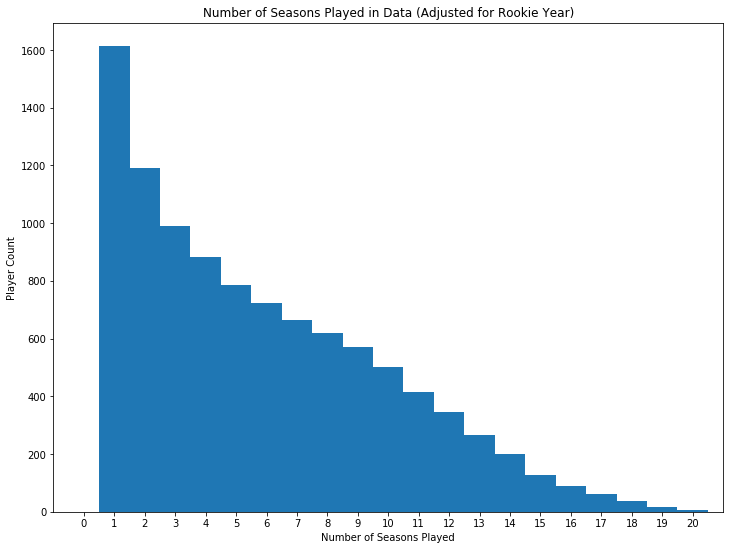

In [4]:
data = joined['Seasons_number']
bins = np.arange(22) - 0.5
plt.figure(figsize=(12,9))
plt.hist(data, bins)
plt.xticks(range(21))
plt.xlim([-1,21])
plt.xlabel('Number of Seasons Played')
plt.ylabel('Player Count')
plt.title('Number of Seasons Played in Data (Adjusted for Rookie Year)')

Let's get rid of the players that played less than 4 years, as we aren't really concerned about predicting them

Text(0.5, 1.0, 'Number of Seasons Played--4 years+ (Adjusted for Rookie Year)')

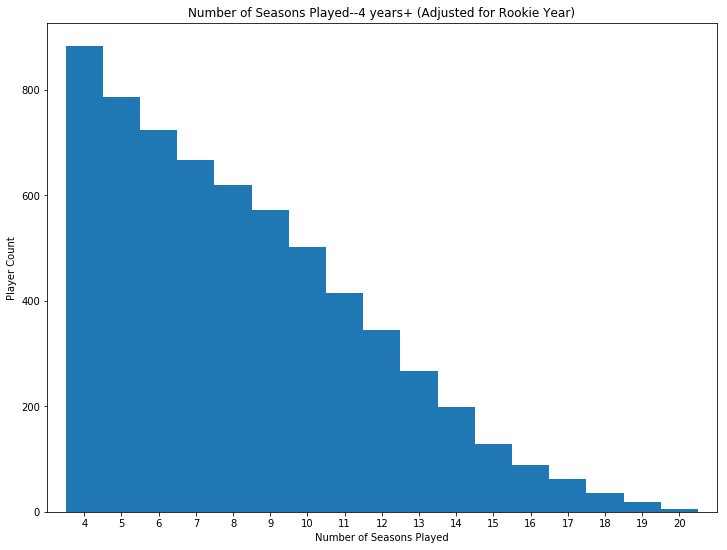

In [5]:
data = joined[joined['Seasons_number']>3]['Seasons_number']
bins = np.arange(22) - 0.5
plt.figure(figsize=(12,9))
plt.hist(data, bins)
plt.xticks(range(4,21))
plt.xlim([3,21])
plt.xlabel('Number of Seasons Played')
plt.ylabel('Player Count')
plt.title('Number of Seasons Played--4 years+ (Adjusted for Rookie Year)')

Plot Average minutes year 4 x-axis, years in league (5-9 in y)

In [6]:
avg_min_year4 = joined.loc[joined['Seasons_number']==4,['Player','MP_pergame']]

In [7]:
#avg_min_year5 = joined.loc[joined['Seasons_number']==5,['Player','MP_pergame']]
#avg_min_year6 = joined.loc[joined['Seasons_number']==6,['Player','MP_pergame']]
#avg_min_year7 = joined.loc[joined['Seasons_number']==7,['Player','MP_pergame']]
#avg_min_year8 = joined.loc[joined['Seasons_number']==8,['Player','MP_pergame']]
#avg_min_year9 = joined.loc[joined['Seasons_number']==9,['Player','MP_pergame']]

In [8]:
max_seasons_played = joined[joined['Seasons_number']>=4].groupby('Player').max()['Seasons_number']

In [9]:
max_seasons_played

Player
A.C. Green              16
A.J. Price               6
Aaron Brooks            11
Aaron Gordon             4
Aaron Gray               7
Aaron McKie             13
Aaron Williams          15
Acie Earl                4
Acie Law                 4
Adam Keefe               9
Adam Morrison            4
Adonal Foyle            12
Adonis Jordan            6
Adreian Payne            4
Adrian Caldwell          9
Adrian Griffin           9
Al Harrington           16
Al Horford              11
Al Jefferson            14
Al Thornton              4
Al-Farouq Aminu          8
Alan Anderson           12
Alan Henderson          12
Alec Burks               7
Aleksandar Radojevic     6
Alex Acker               4
Alex Len                 5
Alexis Ajinca            9
Allan Houston           12
Allen Crabbe             5
                        ..
Walter McCarty          10
Wang Zhizhi              5
Wayman Tisdale          12
Wayne Ellington          9
Wesley Johnson           8
Wesley Matthews      

In [10]:
max(max_seasons_played)

23

In [11]:
mins = avg_min_year4['MP_pergame']

In [12]:
avg_min_year4

Player  MP_pergame
13              A.J. Price        22.4
19            Aaron Brooks        21.8
29            Aaron Gordon        32.9
33              Aaron Gray        13.0
42             Aaron McKie        22.4
53          Aaron Williams        17.1
66               Acie Earl        10.6
70                Acie Law        14.2
79           Adam Morrison         7.8
83            Adonal Foyle        25.1
97           Adreian Payne         8.6
103         Adrian Griffin        18.6
112          Al Harrington        29.8
128             Al Horford        35.1
139           Al Jefferson        35.6
153            Al Thornton        19.5
157        Al-Farouq Aminu        25.6
172         Alan Henderson        30.1
190             Alec Burks        33.3
201             Alex Acker         8.0
209               Alex Len        20.3
228          Allan Houston        33.1
241           Allen Crabbe        28.5
246          Allen Iverson        40.8
260             Alonzo Gee        31.0
286         Alvin Williams        29.2
299      Amar'e Stoudemire        16.7
313           Amir Johnson        14.7
326       Anderson Varejao        27.5
341         Andray Blatche        24.0
...                    ...         ...
9773          Vince Carter        39.8
9803      Vitaly Potapenko        22.7
9824   Vladimir Radmanovic        29.5
9836     Vladimir Stepania        13.2
9842             Von Wafer        19.4
9850         Voshon Lenard        15.8
9864      Wally Szczerbiak        35.3
9885        Walter McCarty        14.4
9896           Wang Zhizhi         7.1
9902       Wayne Ellington        21.3
9917        Wesley Johnson        28.4
9925       Wesley Matthews        34.8
9932         Wesley Person        39.0
9943           Will Barton        28.7
9948            Will Bynum        14.1
9957           Will Conroy         7.2
9981          Willie Green        24.9
9999       Wilson Chandler        33.3
10009         Xavier Henry        21.1
10021     Yakhouba Diawara         7.3
10025             Yao Ming        34.2
10035          Yi Jianlian        17.7
10038           Yinka Dare         6.0
10047          Zach LaVine        27.3
10051        Zach Randolph        34.8
10066            Zan Tabak        17.3
10075        Zaza Pachulia        28.1
10090       Zeljko Rebraca        16.0
10095      Zendon Hamilton        10.3
10105   Zydrunas Ilgauskas        25.7

[883 rows x 2 columns]

In [13]:
type(max_seasons_played)

pandas.core.series.Series

In [14]:
max_frame = max_seasons_played.to_frame()

In [15]:
merged = max_frame.merge(avg_min_year4, left_index=True, right_on='Player')
merged.head()

Seasons_number        Player  MP_pergame
13               6    A.J. Price        22.4
19              11  Aaron Brooks        21.8
29               4  Aaron Gordon        32.9
33               7    Aaron Gray        13.0
42              13   Aaron McKie        22.4

Text(0, 0.5, 'Number of seasons played in NBA')

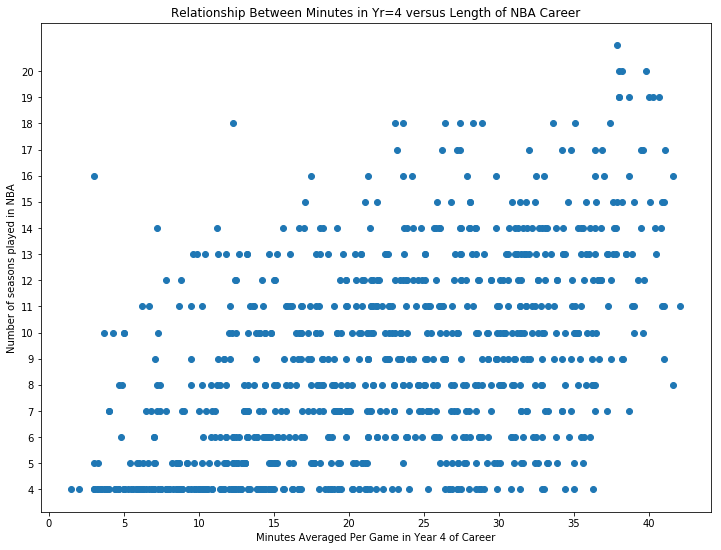

In [16]:
plt.figure(figsize=(12,9))
plt.scatter(merged['MP_pergame'],merged['Seasons_number'])
plt.yticks(range(4,21))
plt.title("Relationship Between Minutes in Yr=4 versus Length of NBA Career")
plt.xlabel('Minutes Averaged Per Game in Year 4 of Career')
plt.ylabel('Number of seasons played in NBA')


Definitely a relationship between the minutes plac

In [17]:
merged[merged['Seasons_number']==16]

Seasons_number            Player  MP_pergame
112               16     Al Harrington        29.8
514               16    Antawn Jamison        37.0
697               16   Antonio McDyess        38.7
848               16       Ben Wallace        24.2
1496              16  Cedric Henderson        17.5
1621              16    Chris Andersen        21.3
3330              16     Erick Dampier        23.6
4908              16         Joe Smith        33.0
6348              16     Manu Ginobili        27.9
7255              16      Nene Hilario         3.0
7849              16     Rashard Lewis        36.4
8778              16      Shawn Marion        41.6
9196              16      Theo Ratliff        32.5

For that weird 3-mpg outlier, in 2005–06, Nenê missed 81 games after suffering a torn ACL in his right knee after just three minutes of action against the San Antonio Spurs in the Denver's season opening game on November 1.  Nene is that outlier

## Correlations 

Looking at the Pearson Correlation coefficient for the entire dataset, it unsurprisingly appears that OWS (Offensive Win Shares) and DWS (Defensive Win Shares) are tightly correlated to Win Shares.  Given that WS is calculated from OWS and DWS (as a combination of the two), we should expect a very high correlation.  

Value over Replacement Player (VORP) is also highly correlated with Win Shares. VORP converts the BPM rate into an estimate of each player's overall contribution to the team, measured vs. what a theoretical "replacement player" would provide, where the "replacement player" is defined as a player on minimum salary or not a normal member of a team's rotation.

So, when I look at the correlation between VORP and BPM, I expect to see a high value.

None of the negative columns were that negative, so I'm just going to look at the most positive values first



In [18]:
correlations  = joined.corr()['WS'].reset_index().sort_values('WS',ascending=False).reset_index().drop('level_0',axis=1)
correlations

index        WS
0               WS  1.000000
1              OWS  0.947822
2             VORP  0.911436
3              DWS  0.839455
4         MP_total  0.826861
5             PS/G  0.792089
6               FG  0.780928
7       MP_pergame  0.759493
8               GS  0.753295
9               FT  0.747433
10              2P  0.745480
11             FTA  0.738804
12             FGA  0.721284
13             2PA  0.698549
14             DRB  0.698389
15             TRB  0.661517
16             BPM  0.649138
17               G  0.636844
18             TOV  0.618307
19             STL  0.611187
20             PER  0.602798
21            OBPM  0.602502
22             AST  0.541247
23           WSp48  0.520264
24              PF  0.519839
25             ORB  0.482557
26             BLK  0.424812
27             TS%  0.415826
28              3P  0.384989
29             3PA  0.362678
30            eFG%  0.354659
31             FG%  0.343106
32             2P%  0.324997
33            USG%  0.319964
34            DBPM  0.318857
35             FT%  0.283132
36            AST%  0.267225
37             3P%  0.187618
38            DRB%  0.179492
39  Seasons_number  0.170944
40            TRB%  0.126311
41             FTr  0.102605
42            STL%  0.071312
43            BLK%  0.070831
44             Age  0.063086
45            ORB%  0.011595
46          Season -0.013400
47            3PAr -0.022049
48            TOV% -0.189667

In [19]:
columns = list(correlations['index'][:15])
columns

['WS',
 'OWS',
 'VORP',
 'DWS',
 'MP_total',
 'PS/G',
 'FG',
 'MP_pergame',
 'GS',
 'FT',
 '2P',
 'FTA',
 'FGA',
 '2PA',
 'DRB']

In [20]:
list(correlations['index'][:22])

['WS',
 'OWS',
 'VORP',
 'DWS',
 'MP_total',
 'PS/G',
 'FG',
 'MP_pergame',
 'GS',
 'FT',
 '2P',
 'FTA',
 'FGA',
 '2PA',
 'DRB',
 'TRB',
 'BPM',
 'G',
 'TOV',
 'STL',
 'PER',
 'OBPM']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ac394a8>,
      dtype=object)

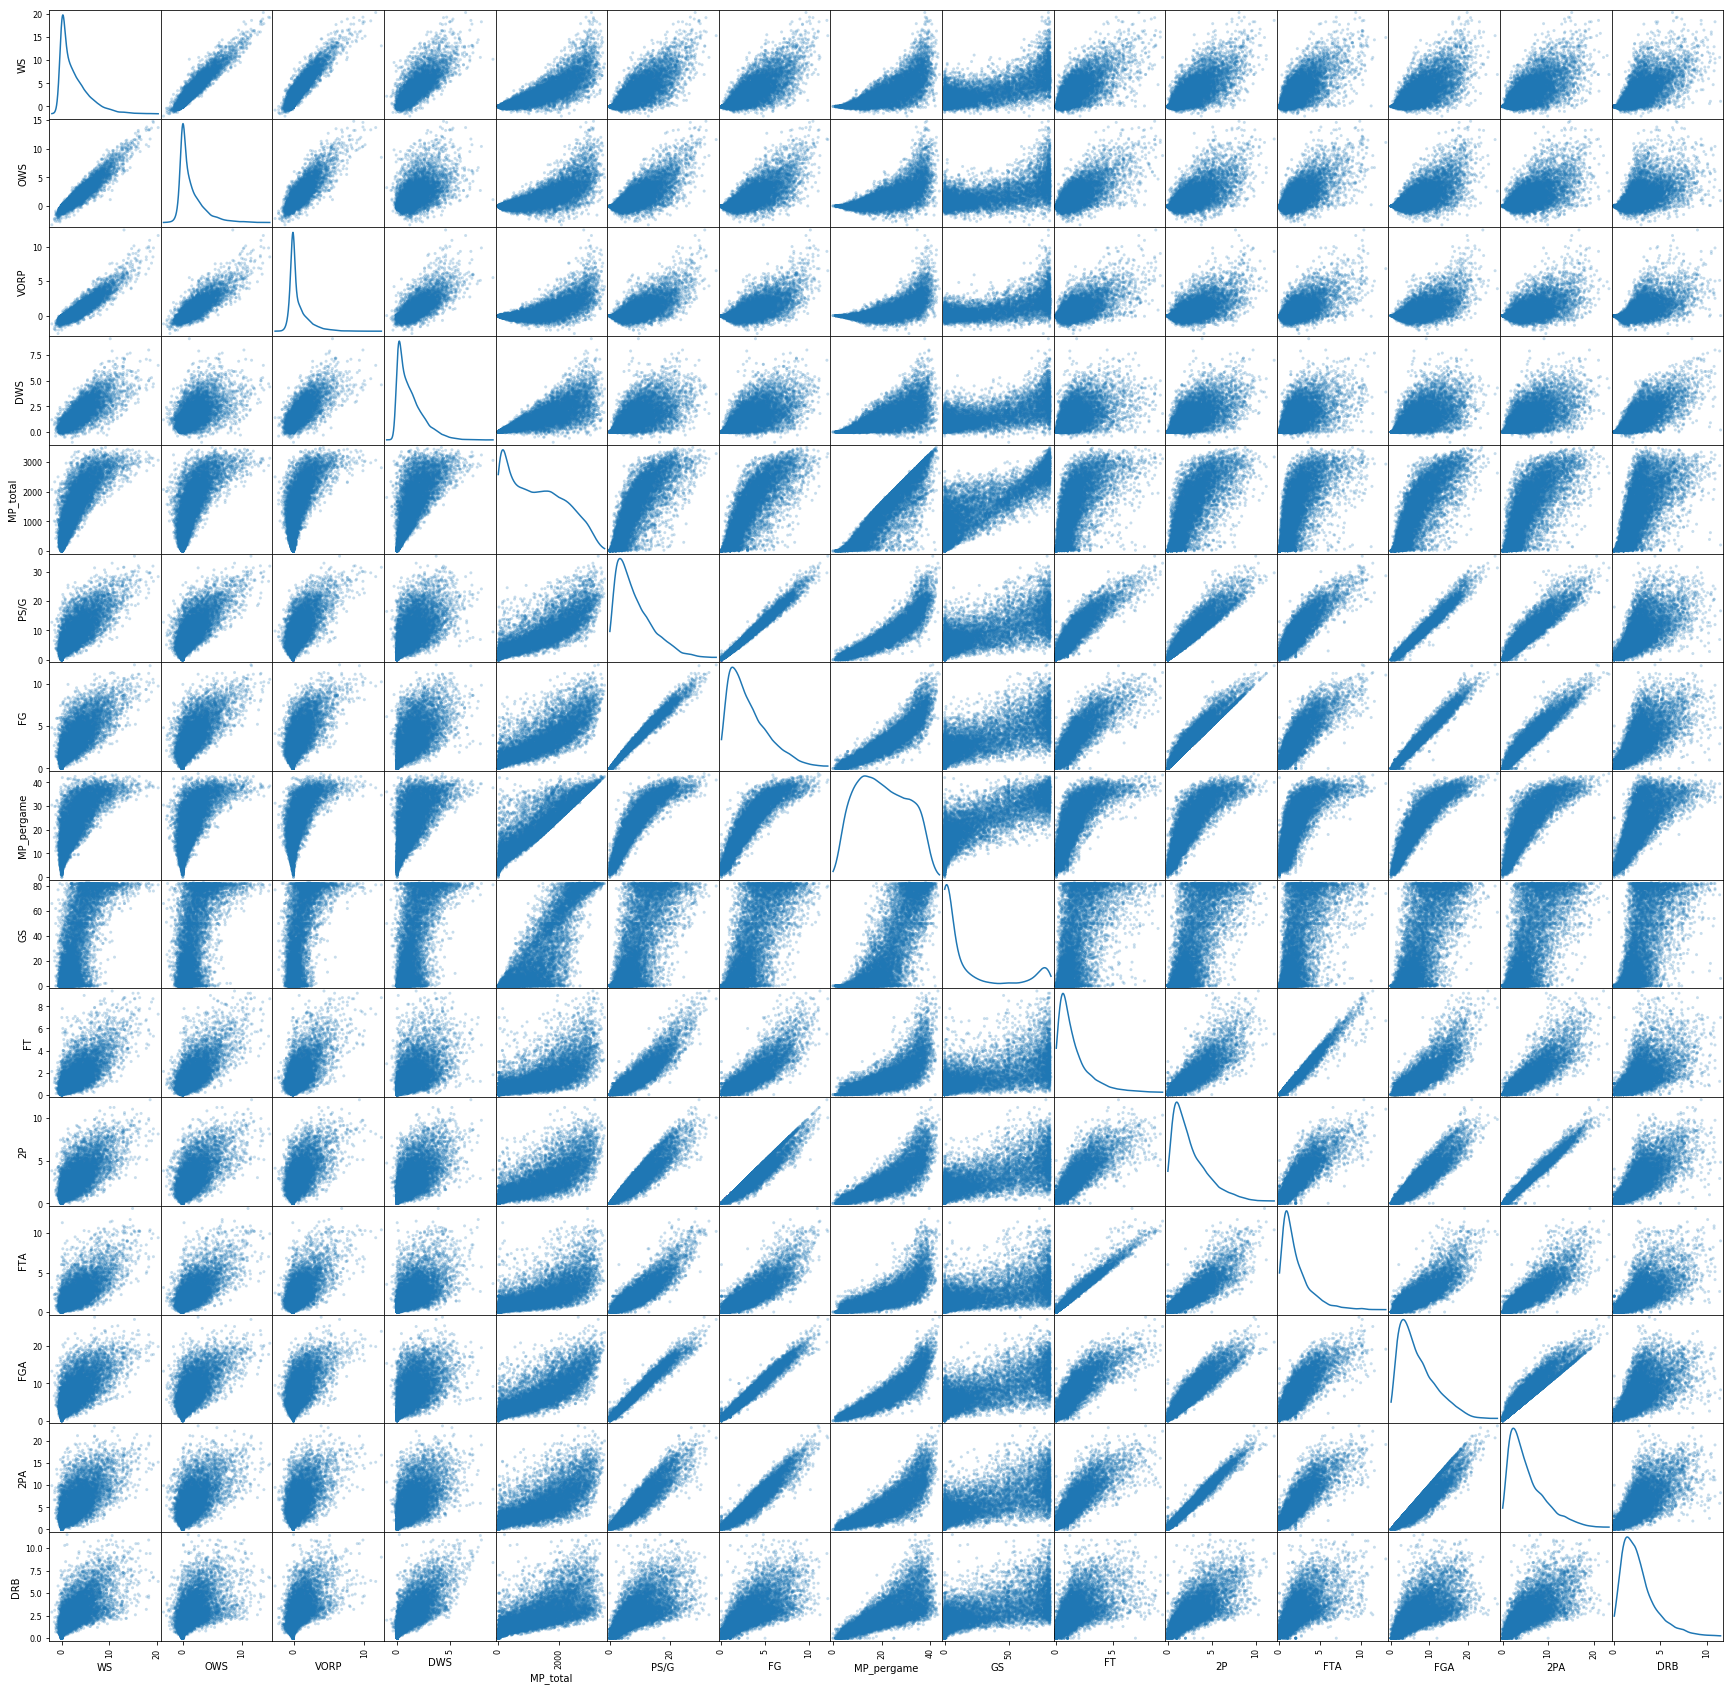

In [21]:
filtered = joined[columns]

scatter_matrix(filtered,alpha=.25, diagonal='kde',figsize=(30,30))

Let's look at total minutes played as a proxy

In [22]:
correlations  = joined.corr()['MP_total'].reset_index().sort_values('MP_total',ascending=False).reset_index().drop('level_0',axis=1)

In [23]:
correlations

index  MP_total
0         MP_total  1.000000
1       MP_pergame  0.907862
2               GS  0.862674
3                G  0.853844
4               WS  0.826861
5               FG  0.825657
6             PS/G  0.822279
7              FGA  0.813677
8              DWS  0.785617
9               2P  0.764310
10             2PA  0.758565
11             OWS  0.730131
12             TOV  0.727175
13             STL  0.693901
14              FT  0.693047
15             FTA  0.685220
16             DRB  0.682574
17            VORP  0.677902
18              PF  0.643431
19             TRB  0.634570
20             AST  0.606656
21             BPM  0.595922
22            OBPM  0.573038
23             PER  0.498421
24              3P  0.477464
25             3PA  0.475642
26             ORB  0.435823
27           WSp48  0.391303
28             TS%  0.371111
29             FT%  0.364827
30             BLK  0.358610
31            eFG%  0.320357
32            AST%  0.297064
33            USG%  0.293844
34             FG%  0.280948
35             2P%  0.279983
36             3P%  0.278582
37            DBPM  0.258686
38  Seasons_number  0.149247
39            STL%  0.058196
40            DRB%  0.054157
41            3PAr  0.048986
42             Age  0.027922
43             FTr -0.011413
44          Season -0.016744
45            TRB% -0.021957
46            BLK% -0.028045
47            ORB% -0.118331
48            TOV% -0.183517

In [24]:
columns = list(correlations['index'][2:13])
columns

['GS', 'G', 'WS', 'FG', 'PS/G', 'FGA', 'DWS', '2P', '2PA', 'OWS', 'TOV']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a23370c50>,
      dtype=object)

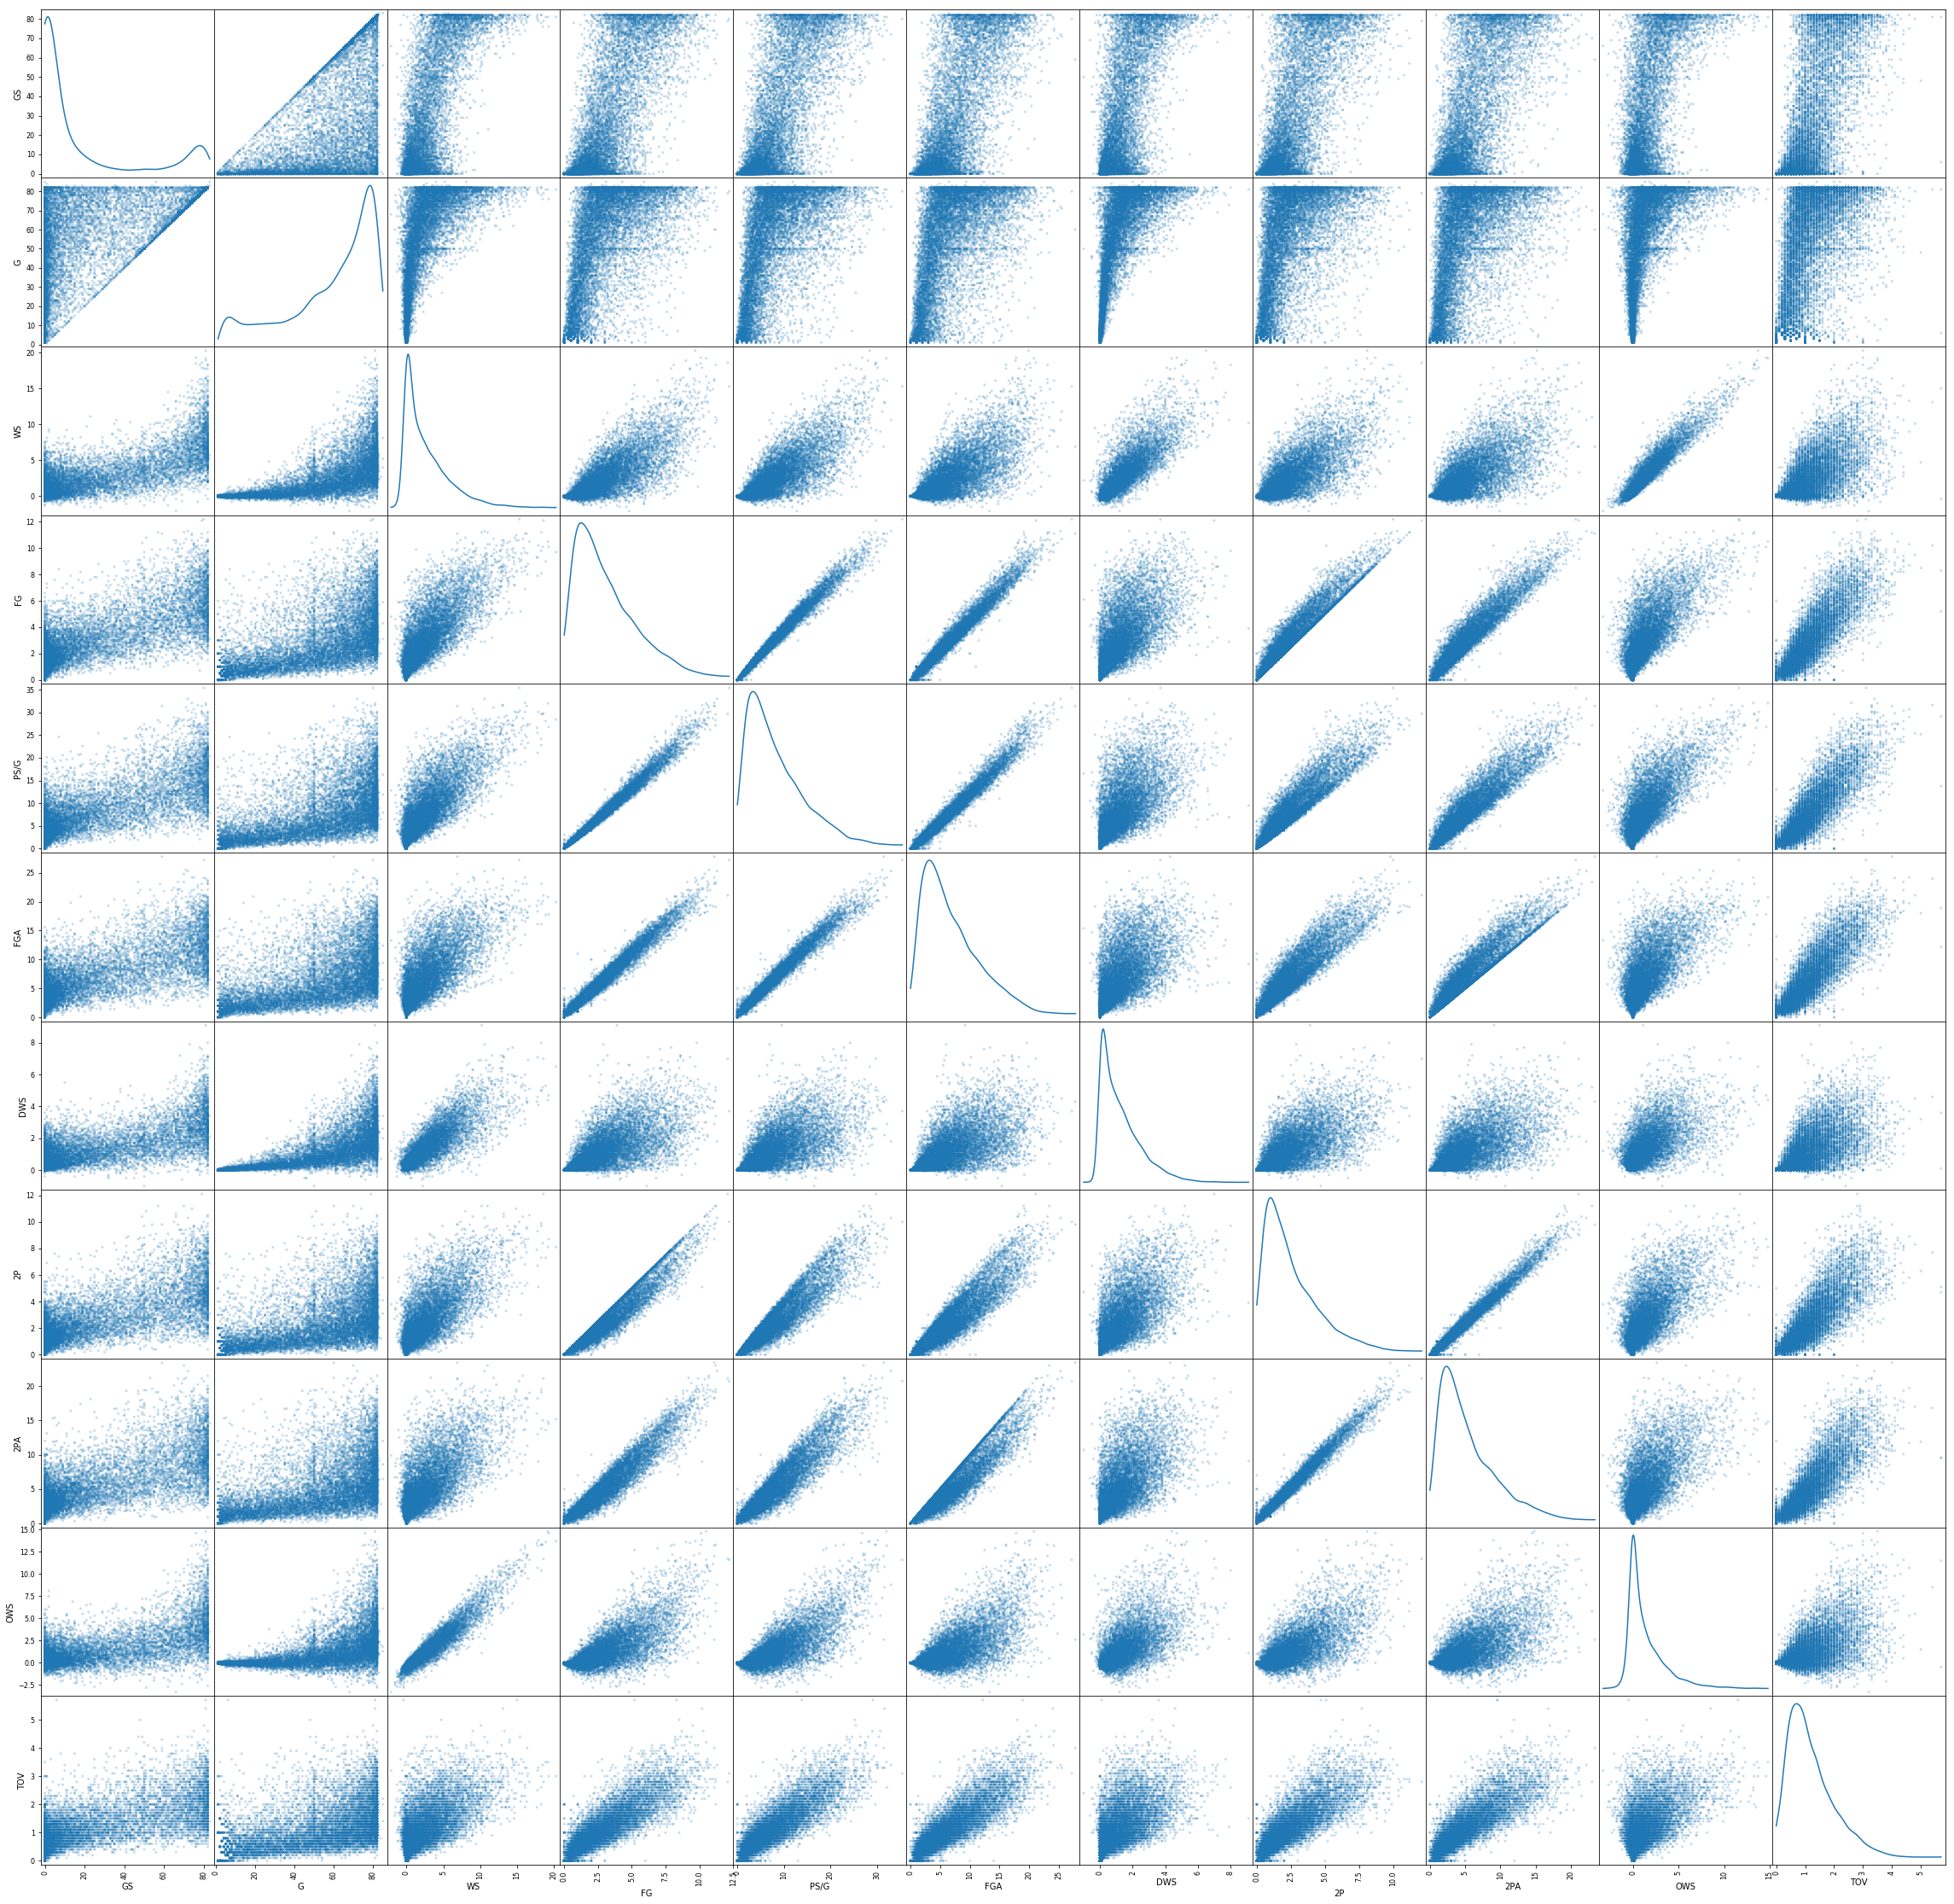

In [25]:
filtered = joined[columns]

scatter_matrix(filtered,alpha=.25, diagonal='kde',figsize=(40,40))

In [26]:
list(correlations['index']

SyntaxError: unexpected EOF while parsing (<ipython-input-26-adf03eaa752c>, line 1)

In [ ]:
playercountdemo = demographic.groupby('name').count()['year_start']

In [ ]:
playercountdemo[playercountdemo>1]

Only collission from the above list is Tony Mitchell--two forwards in the league in 2014 by that name.

In [ ]:
seasonal[seasonal['Player']=='Tony Mitchell']

In [ ]:
joined[joined['Player']=='Tony Mitchell']

In [ ]:
joined[joined['Player']=='Michael Redd']